In [1]:
import os
os.chdir("D://Master//10. TFM//Data")

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.stats import boxcox, probplot, norm, shapiro
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import shapiro, probplot
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster import cluster_visualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

In [3]:
df = pd.read_csv("df_formula_va.csv")
df.head()

,price,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,city_curitiba,city_guarulhos,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
0,-0.338623,0.696347,-1.076442,0.920661,-0.380505,-0.169550,-0.147871,-0.121872,-0.12604,-0.108938,...,-0.285139,1.35068,-0.238266,-0.206148,-0.258609,-0.504953,0.589342,-0.12339,-0.172902,-0.10346
1,-0.355113,0.696347,-1.076442,-0.009442,-0.380505,-0.169550,-0.147871,-0.121872,-0.12604,-0.108938,...,-0.285139,1.35068,-0.238266,-0.206148,-0.258609,1.980364,-1.696793,-0.12339,-0.172902,-0.10346
2,-0.305641,-0.025469,0.905068,-0.319476,0.638195,5.897921,-0.147871,-0.121872,-0.12604,-0.108938,...,-0.285139,1.35068,-0.238266,-0.206148,-0.258609,-0.504953,0.589342,-0.12339,-0.172902,-0.10346
3,-0.338623,0.696347,-1.076442,0.610627,-0.889856,-0.169550,-0.147871,-0.121872,-0.12604,-0.108938,...,-0.285139,1.35068,-0.238266,-0.206148,-0.258609,-0.504953,0.589342,-0.12339,-0.172902,-0.10346
4,-0.338623,0.696347,-1.076442,0.610627,0.128845,-0.169550,-0.147871,-0.121872,-0.12604,-0.108938,...,-0.285139,1.35068,-0.238266,-0.206148,-0.258609,-0.504953,0.589342,-0.12339,-0.172902,-0.10346


### Clustering Jerárquico

In [4]:
subset_df = df.sample(frac=0.2, random_state=42)

In [5]:
hc = AgglomerativeClustering(n_clusters=2, linkage="ward")
cluster_labels = hc.fit_predict(subset_df)

In [6]:
df_total = subset_df.copy()
df_total['cluster'] = cluster_labels


In [7]:
descriptivos_grupos = df_total.groupby(['cluster'],as_index=False).mean()
descriptivos_grupos

,cluster,price,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,city_curitiba,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
0,0,-0.005901,0.001049,0.001907,-0.007684,0.005440,0.013364,-0.147871,-0.017851,0.003623,...,0.002061,0.011176,-0.009083,0.001083,-0.003599,0.000382,-0.005112,0.008594,0.010510,-0.007095
1,1,-0.007738,-0.049161,0.033550,-0.004693,-0.055056,-0.169550,6.686974,-0.121872,-0.126040,...,-0.036200,-0.049448,-0.015049,-0.006967,0.021233,-0.010065,0.054076,-0.069378,-0.042563,-0.039332


In [8]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(subset_df,df_total['cluster'])

In [9]:
silhouette_avg

0.2513186067245828

In [12]:
distance_matrix = pdist(subset_df)
linkage_matrix = linkage(distance_matrix, method='ward')
coph_corr, coph_dist = cophenet(linkage_matrix, distance_matrix)

print(f"Coeficiente de correlación cofenética: {coph_corr}")

Coeficiente de correlación cofenética: 0.5056464798043472


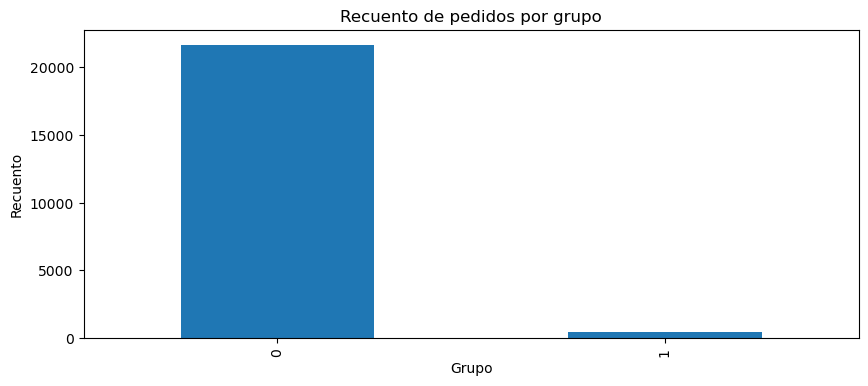

In [10]:
df_total.cluster.value_counts().plot(kind='bar', figsize=(10,4))
plt.title('Recuento de pedidos por grupo')
plt.xlabel('Grupo')
_ = plt.ylabel('Recuento')

In [11]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(subset_df)

In [12]:
pc_df = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2'])
pca_result = pd.concat([pc_df, df_total['cluster'].reset_index(drop=True)], axis=1)

In [13]:
pca_result.head()

,pc1,pc2,cluster
0,2.566622,-0.093862,0
1,-0.113669,3.748142,0
2,-1.386906,-0.362176,0
3,0.489645,-0.428293,0
4,2.225044,-1.379915,0


In [14]:
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
target_variance_ratio = 0.95
num_components_for_target_variance = np.argmax(explained_variance_ratio_cumulative >= target_variance_ratio) + 1

Número de componentes para el 95.0% de varianza explicada: 1


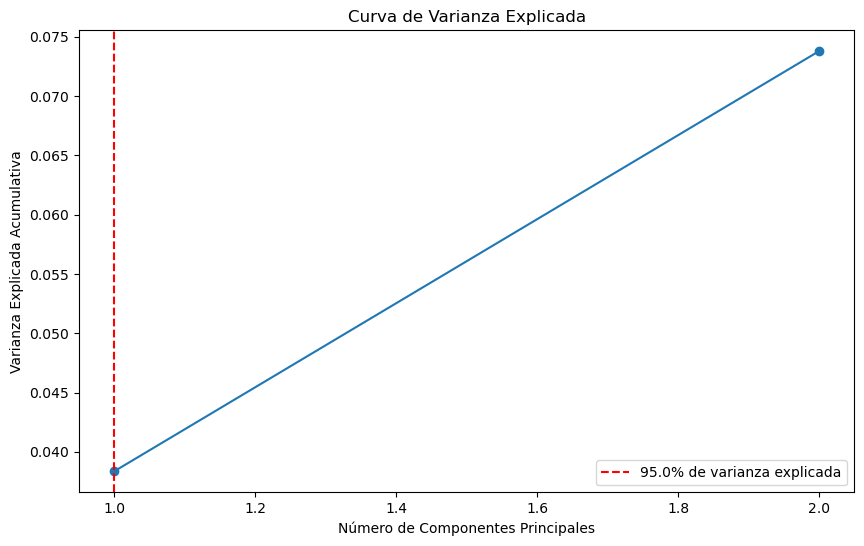

In [15]:
print(f'Número de componentes para el {target_variance_ratio*100}% de varianza explicada: {num_components_for_target_variance}')

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
plt.axvline(x=num_components_for_target_variance, color='red', linestyle='--', label=f'{target_variance_ratio*100}% de varianza explicada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Curva de Varianza Explicada')
plt.legend()
plt.show()

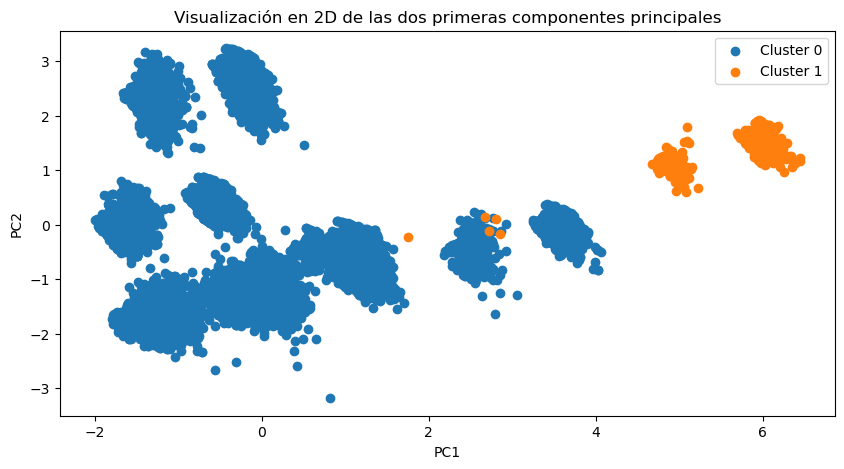

In [16]:
plt.figure(figsize=(10, 5))
for cluster in pca_result['cluster'].unique():
    subset_cluster = pca_result[pca_result['cluster'] == cluster]
    plt.scatter(subset_cluster['pc2'], subset_cluster['pc1'], label=f'Cluster {cluster}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualización en 2D de las dos primeras componentes principales')
plt.legend()
plt.show()

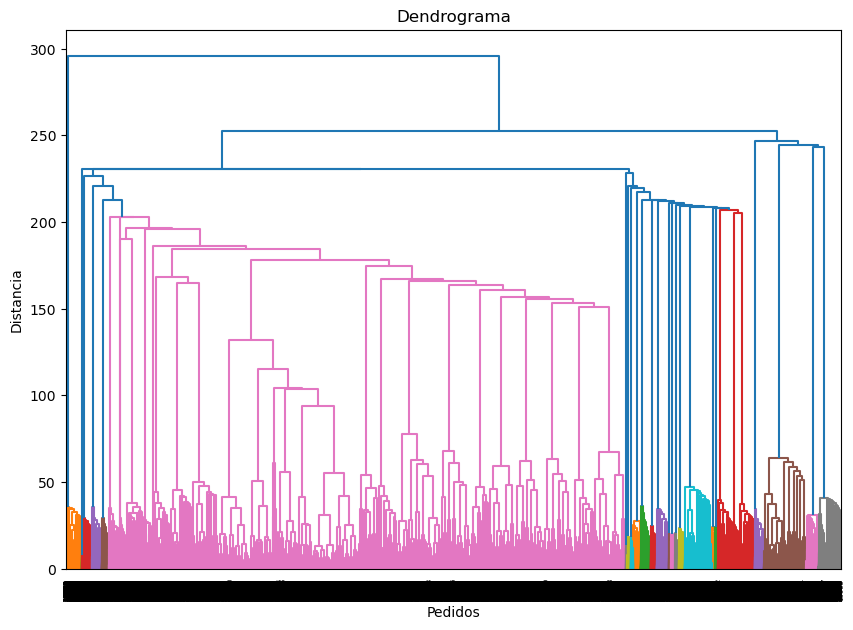

In [17]:
plt.figure(figsize=(10, 7))
dendogram = sch.dendrogram(sch.linkage(subset_df, method="ward"))
plt.title('Dendrograma')
plt.xlabel('Pedidos')
plt.ylabel('Distancia')
plt.show()

<Figure size 1200x800 with 0 Axes>

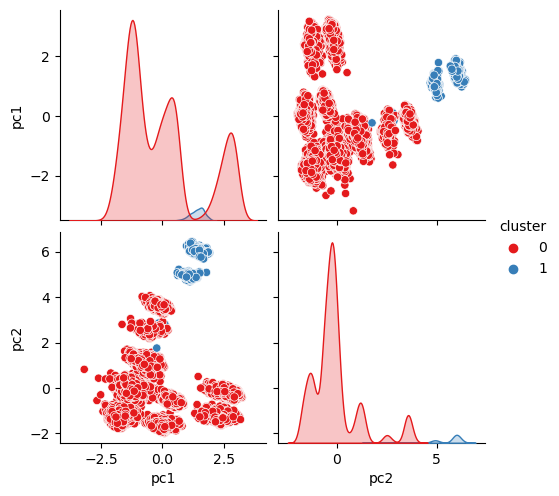

In [18]:
plt.figure(figsize=(12, 8))
sns.pairplot(pca_result, hue='cluster', palette='Set1')
plt.show()